In [1]:
import pandas as pd 

In [29]:
data1=pd.read_csv('Throughput_And_DataVolume.csv')
data2=pd.read_csv('KPI Analysis Result_Query_Result_20210715164945305.csv')
data3=pd.read_csv('BATCH1_Query_Result.csv')

In [40]:
df_1 = pd.merge(data1, data2, on=['Date', 'eNodeB Name', 'eNodeB Function Name', 'Cell Name',
       'LocalCell Id', 'Cell FDD TDD Indication', 'Integrity'])

In [31]:
df_2 = pd.merge(df_1, data3, on=['Date', 'eNodeB Name', 'eNodeB Function Name', 'Cell Name',
       'LocalCell Id', 'Cell FDD TDD Indication', 'Integrity'])

In [44]:
df_1.to_csv('DF1.csv',index=False, index_label=False)
#df_2.to_csv('DF2.csv',index=False, index_label=False)

In [ ]:
df_1.columns

Index(['Date', 'eNodeB Name', 'eNodeB Function Name', 'Cell Name',
       'LocalCell Id', 'Cell FDD TDD Indication', 'Integrity',
       '(Voda) Border UE Traffic(%)', '(Voda) Downlink Traffic Volume(MB)',
       '(Voda) Uplink Traffic Volume(MB)', 'Cell Traffic Volume_DL(Gbit)',
       'Cell Traffic Volume_UL(Gbit)', 'DL Traffic Volume',
       'PS Traffic (kbit)', 'Total Traffic (kbit)', 'UL Traffic Volume',
       'L.ChMeas.CCE.Avail', 'L.ChMeas.CCE.CommUsed', 'L.ChMeas.CCE.DLUsed',
       'L.ChMeas.CCE.ULUsed'],
      dtype='object')

In [41]:
df_1.iloc[0:] = df_1.iloc[0:] .fillna(0)


In [42]:
df_1 = df_1.drop(df_1[ (df_1['(Voda) Border UE Traffic(%)']==0)& 
                        (df_1['(Voda) Downlink Traffic Volume(MB)']==0)&
                        (df_1['(Voda) Uplink Traffic Volume(MB)']==0)&
                        (df_1['Cell Traffic Volume_DL(Gbit)']==0)&
                        (df_1['Cell Traffic Volume_UL(Gbit)']==0)& 
                        (df_1['DL Traffic Volume']==0)&
                        (df_1['PS Traffic (kbit)']==0)& 
                        (df_1['Total Traffic (kbit)']==0)& 
                        (df_1['UL Traffic Volume']==0)&
                        (df_1['L.ChMeas.CCE.Avail']==0)& 
                        (df_1['L.ChMeas.CCE.CommUsed']==0)&
                        (df_1['L.ChMeas.CCE.DLUsed']==0)&
                        (df_1['L.ChMeas.CCE.ULUsed']==0)].index)
                        # (df_1['L.Thrp.bits.UL(bit)']==0)& 
                        # (df_1['L.Thrp.bits.DL(bit)']==0)&
                        # (df_1['L.Thrp.Time.UL(ms)']==0)&
                        # (df_1['L.Thrp.Time.DL(ms)']==0)& 
                        # (df_1['L.ChMeas.PRB.DL.Used.Avg']==0)&
                        # (df_1['L.ChMeas.PRB.UL.Used.Avg']==0)&
                        # (df_1['L.ChMeas.PRB.DL.Avail']==0)&
                        # (df_1['L.ChMeas.PRB.UL.Avail' ]==0)].index)


In [45]:
df_11=pd.read_csv('DF1.csv')

In [81]:
list1=[]
for i in range(0,len(df_11)):
   # m=df_11['L.ChMeas.CCE.CommUsed'][i] + df_11['L.ChMeas.CCE.ULUsed'][i] + df_11['L.ChMeas.CCE.DLUsed'][i]+df_11['L.ChMeas.CCE.Avail'][i]
    list1.append( ( df_11['L.ChMeas.CCE.CommUsed'][i] + df_11['L.ChMeas.CCE.ULUsed'][i] + df_11['L.ChMeas.CCE.DLUsed'][i] )/(df_11['L.ChMeas.CCE.CommUsed'][i] + df_11['L.ChMeas.CCE.ULUsed'][i] + df_11['L.ChMeas.CCE.DLUsed'][i]+df_11['L.ChMeas.CCE.Avail'][i])/3600/1000*100)


In [82]:
df_11.insert(23,'CCE_usageFF/3600/1000', list1, True)

In [25]:
df_1['CCE_usage'][0]

inf

In [2]:
#df_11.to_csv('CCE_usage.csv',index=False, index_label=False)

In [3]:
df_11=pd.read_csv('CCE_usage.csv')

In [4]:
df = pd.DataFrame(df_11,columns=['Cell Traffic Volume_DL(Gbit)','Cell Traffic Volume_UL(Gbit)'])

In [5]:
######################################################################3
from sklearn.cluster import KMeans
wcss = []                    #within-cluster sum of square
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(df)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

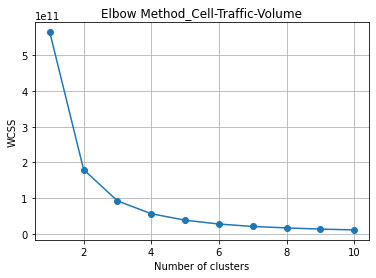

In [7]:
import matplotlib.pyplot as plt
number_of_clusters = range(1,11)
plt.plot(number_of_clusters, wcss, marker='o')
plt.title('Elbow Method_Cell-Traffic-Volume')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(axis='both')
plt.show()

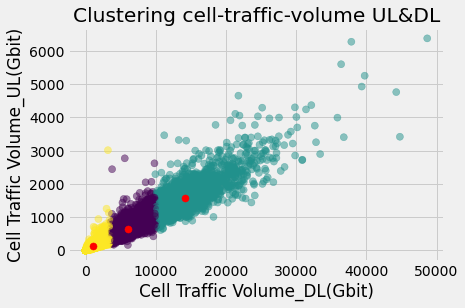

In [8]:
##clustring
kmeans = KMeans(n_clusters=3).fit(df)     #'(Voda) Downlink Traffic Volume(MB)','(Voda) Uplink Traffic Volume(MB)'
centroids = kmeans.cluster_centers_       #Cell Traffic Volume_DL(Gbit)  Cell Traffic Volume_UL(Gbit)
df_11['cluster_num'] = pd.Series((kmeans.labels_)+1, index=df_11.index)

plt.style.use("fivethirtyeight")
plt.scatter(df['Cell Traffic Volume_DL(Gbit)'], df['Cell Traffic Volume_UL(Gbit)'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

# for j,i in enumerate(f):
#     x2 = df_11.iloc[i]['Cell Traffic Volume_DL(Gbit)']
#     y2 = df_11.iloc[i]['Cell Traffic Volume_UL(Gbit)']
#     if j==0:
#         plt.scatter(x2, y2,color = "red",edgecolors='black',label='CELLS-with-High-CCE-usage')
#     else:
#         plt.scatter(x2, y2, color = "red") 

plt.title('Clustering cell-traffic-volume UL&DL')
plt.xlabel('Cell Traffic Volume_DL(Gbit)')
plt.ylabel('Cell Traffic Volume_UL(Gbit)')
plt.show()

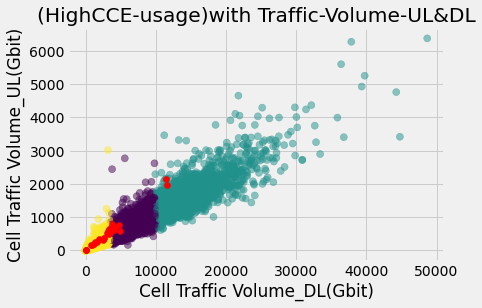

In [12]:
plt.style.use("fivethirtyeight")             #Cell Traffic Volume_DL(Gbit)  Cell Traffic Volume_UL(Gbit)
plt.scatter(df['Cell Traffic Volume_DL(Gbit)'], df['Cell Traffic Volume_UL(Gbit)'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
#plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

for j,i in enumerate(f):
    x2 = df_11.iloc[i]['Cell Traffic Volume_DL(Gbit)']
    y2 = df_11.iloc[i]['Cell Traffic Volume_UL(Gbit)']
    if j==0:
        plt.scatter(x2, y2,color = "red",edgecolors='black',label='CELLS-with-High-CCE-usage')
    else:
        plt.scatter(x2, y2, color = "red") 


plt.title('(HighCCE-usage)with Traffic-Volume-UL&DL')
plt.xlabel('Cell Traffic Volume_DL(Gbit)')
plt.ylabel('Cell Traffic Volume_UL(Gbit)')
plt.show()

In [16]:
df2=pd.DataFrame()                           #Cell Traffic Volume_DL(Gbit)  Cell Traffic Volume_UL(Gbit)
x1=[];y1=[];z1=[];cell=[];cluster=[];enodeB=[] 
for i in (f):
    cell.append(df_11.iloc[i]['Cell Name'])
   # enodeB.append(df_11.iloc[i]['eNodeB'])
    x1.append(df_11.iloc[i]['Cell Traffic Volume_DL(Gbit)'])
    y1.append(df_11.iloc[i]['Cell Traffic Volume_UL(Gbit)'])
    z1.append(df_11.iloc[i]['CCE_usage'])
    cluster.append(df_11.iloc[i]['cluster_num'])
#df2.insert(0, 'ENodeB', enodeB, True)        
df2.insert(0, 'Cell Name', cell, True)    
df2.insert(1, 'Cell Traffic Volume_DL(Gbit)', x1, True)
df2.insert(2, 'Cell Traffic Volume_UL(Gbit)', y1, True)
df2.insert(3, 'CCE_usage', z1, True)
df2.insert(4, 'num_cluster', cluster, True)

In [ ]:
df2.to_csv('CCE_traffic cells.csv',index=False, index_label=False)

In [13]:
from numpy import where
numbersElement = [] 
for i in range(kmeans.n_clusters):
    numbersElement.append(len(where(kmeans.labels_ == i)[0]))
numbersElement

[8059, 2373, 28557]

In [14]:
centroids = kmeans.cluster_centers_
for i in range(kmeans.n_clusters):
    print(centroids[i])
    

[5976.08881054  650.27252049]
[14096.32475275  1583.5603624 ]
[1118.48186097  122.00721313]


In [10]:
def get_index (df_11):
    list11=[]                    ## '(Voda) Downlink Traffic Volume(MB)','(Voda) Uplink Traffic Volume(MB)'
    for i in range(0,len(df_11)):
        if (df_11['CCE_usage'][i]>=70) :
            list11.append(i)
        # if (df_11['cluster_num'][i]==2) and (df_11['VS.RAC.DCCC.Fail.DLCE.Cong'][i]>0)and (df_11['VS.RAC.DCCC.Fail.ULCE.Cong'][i]>0):
        #     list1.append(i) 
    return list11 

In [11]:
f=get_index (df_11)

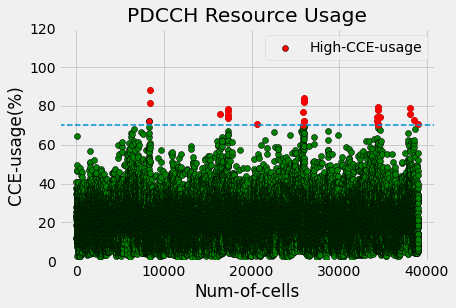

In [86]:
import numpy as np
plt.axhline(70, linewidth=1.5 ,linestyle='--')
plt.scatter(np.linspace(0,len(df_11['CCE_usage']),len(df_11['CCE_usage'])),df_11.loc[:,'CCE_usage'],color = "green",edgecolors='black')

for j,i in enumerate(f):
    y2 = df_11.iloc[i]['CCE_usage']
    if j==0:
        plt.scatter(i, y2,color = "red",edgecolors='black',label='High-CCE-usage')
    else:
        plt.scatter(i, y2, color = "red") 
plt.ylim(0, 120)        
plt.title('PDCCH Resource Usage')
plt.xlabel("Num-of-cells")
plt.ylabel("CCE-usage(%)")
plt.legend()
plt.show()     

In [72]:
####################################################3
data=pd.read_csv('throughput.csv')

In [73]:
# df_12 = pd.merge(df_11, data, on=['Date', 'eNodeB Name', 'eNodeB Function Name', 'Cell Name',
#        'LocalCell Id', 'Cell FDD TDD Indication', 'Integrity'])

In [ ]:
# def get_index (df_12):
#     list1=[];list2=[]                     ## VS.RAC.DCCC.Fail.DLCE.Cong  VS.RAC.DCCC.Fail.ULCE.Cong
#     for i in range(0,len(df_12)):
#         if (df_12['cluster_num'][i]==2) and (df_12['VS.RAC.DCCC.Fail.DLCE.Cong'][i]>0)and (df_12['VS.RAC.DCCC.Fail.ULCE.Cong'][i]>0):
#             list1.append(i)
#         if (df_12['cluster_num'][i]==3) and (df_12['VS.RAC.DCCC.Fail.DLCE.Cong'][i]>0) and (df_12['VS.RAC.DCCC.Fail.ULCE.Cong'][i]>0): 
#             list2.append(i)   
#     return list1 ,list2

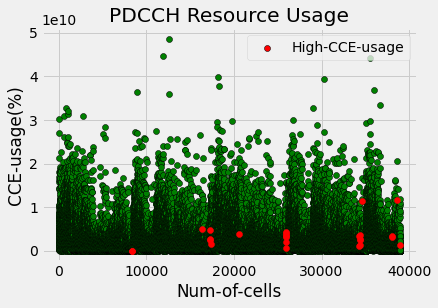

In [87]:
#Total Traffic (kbit)
import numpy as np
#plt.axhline(80, linewidth=1.5 ,linestyle='--')
plt.scatter(np.linspace(0,len(df_11['Total Traffic (kbit)']),len(df_11['Total Traffic (kbit)'])),df_11.loc[:,'Total Traffic (kbit)'],color = "green",edgecolors='black')

for j,i in enumerate(f):
    y2 = df_11.iloc[i]['Total Traffic (kbit)']
    if j==0:
        plt.scatter(i, y2,color = "red",edgecolors='black',label='High-CCE-usage')
    else:
        plt.scatter(i, y2, color = "red") 
# plt.ylim(0, 120)        
plt.title('PDCCH Resource Usage')
plt.xlabel("Num-of-cells")
plt.ylabel("CCE-usage(%)")
plt.legend()
plt.show()
